<a href="https://colab.research.google.com/github/ivychung/plant-ML/blob/improving-cnn-models/tomato_2_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""importing required libraries"""

# so that we can mount google drive
from google.colab import drive

# numerical computation and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# file manipulation
import zipfile
import os
import shutil

# load and show an image with Pillow
from PIL import Image

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
from numpy import asarray

# sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# tensorflow tools
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import *
from keras import callbacks

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Extract the dataset zip file
dataset_name = 'SampleTomatoDataset'
drive_dataset_address = '/content/drive/Shareddrives/Anoushka && Ivy/Senior Design 2021_2022_Ivy and Anoushka/dataset/'
working_dataset_address = os.path.join('/tmp/', dataset_name)

zip_ref = zipfile.ZipFile(drive_dataset_address + dataset_name + '.zip', 'r')
zip_ref.extractall('/tmp/') # Extracts the files into the appropriate folder
zip_ref.close()

In [ ]:
# Removes the __MACOSX file that comes with zipping a file on Mac
try:
  shutil.rmtree('/tmp/__MACOSX')
except:
  pass

In [ ]:
# Function to extract all sub- file/directory names
def read_filenames(dir_path, file_bool = True):
  if file_bool: # list all files in the folder
    return [f for f in os.listdir(dir_path) \
            if os.path.isfile(os.path.join(dir_path, f))]
  if not file_bool: # list all subfolders in the folder
    return [f for f in os.listdir(dir_path) \
            if os.path.isdir(os.path.join(dir_path, f))]


In [ ]:
# getting classes
classes = read_filenames(working_dataset_address,file_bool = False)
classes

['Tomato_unhealthy', 'Tomato_healthy']

In [ ]:
# global variables to keep track of how many classes we have
CLASS_SIZE = len(classes)

In [ ]:
# Collect all image names
img_names = [read_filenames(os.path.join(working_dataset_address, classes[i])) for i in range(CLASS_SIZE)]

# Row length should be the number of classes
print("Row Length", len(img_names))

# collect each column length
row_lengths = []
for i in range(CLASS_SIZE):
  row_lengths.append(len(img_names[i]))

print("Column length", row_lengths)

Row Length 2
Column length [13421, 1591]


In [ ]:
# checking image processing with one image
img_path = os.path.join(working_dataset_address, classes[0], img_names[0][1])

# reading the image
image = Image.open(img_path)

# summarize original image details
print("Original image details")
print(image.format)
print(image.size)
print(image.mode)

# convert image to numpy array of pixel values
data = asarray(image)

# summarize converted image details
print("\nImage in pixel values")
print(type(data))
print(data.shape)


# Checking that image data can be converted back to PIL format
image1 = Image.fromarray(data)
print("\nImage converted back to PIL image")
print(type(image1))
print(image1.size)
print(image1.mode)

Original image details
JPEG
(256, 256)
RGB

Image in pixel values
<class 'numpy.ndarray'>
(256, 256, 3)

Image converted back to PIL image
<class 'PIL.Image.Image'>
(256, 256)
RGB


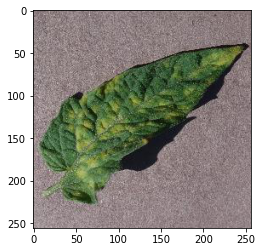

In [ ]:
plt.imshow(data)
plt.show()

In [ ]:
# making a np array of the images in pixel values
x = []
y = []

for i in range(CLASS_SIZE):
  for j in range(len(img_names[i])):
    img_path = os.path.join(working_dataset_address, classes[i], img_names[i][j])
    try:
      img = Image.open(img_path)
      data = asarray(img) # convert image to numpy array
      x.append(data)
      y.append(classes[i])
    except:
      pass

image_count = len(x)
print("Total image count:", image_count)
x = np.asarray(x)
y = np.asarray(y)
print(type(x))

Total image count: 15011
<class 'numpy.ndarray'>


Tomato_healthy
Label is the one expected:  True
Equal amount of responses and predictors:  True 



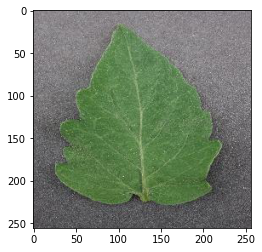

In [ ]:
# comparing the last class label and the label of the last image
# since we are importing the images in order, they should match
print(classes[CLASS_SIZE-1])
print("Label is the one expected: ",y[len(y)-1] == classes[CLASS_SIZE-1])
print("Equal amount of responses and predictors: ",len(x)==len(y),"\n")

plt.imshow(x[len(y)-1])
plt.show()

In [ ]:

# Now we need to split the data into a training and a validating dataset
x_train, x_test, y_train, y_test = train_test_split(x, y,
    test_size=0.2, shuffle = True, random_state = 8)


In [ ]:
# Our x data vectors are dour-dimensional, just as we wanted
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
# We need to reshape our y data vectors
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (12008, 256, 256, 3)
x_test shape: (3003, 256, 256, 3)
y_train shape: (12008,)
y_test shape: (3003,)


In [ ]:
# convert the labels be to int-encoded 
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, CLASS_SIZE)
y_test = keras.utils.to_categorical(y_test, CLASS_SIZE)


# check our final shape
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (12008, 256, 256, 3)
x_test shape: (3003, 256, 256, 3)
y_train shape: (12008, 2)
y_test shape: (3003, 2)


In [ ]:
model = keras.Sequential(
    [
        Input(shape=x_train.shape[1:]),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(CLASS_SIZE, activation='softmax'),
    ],
    'CNN'
)

model.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dropout (Dropout)           (None, 246016)            0       

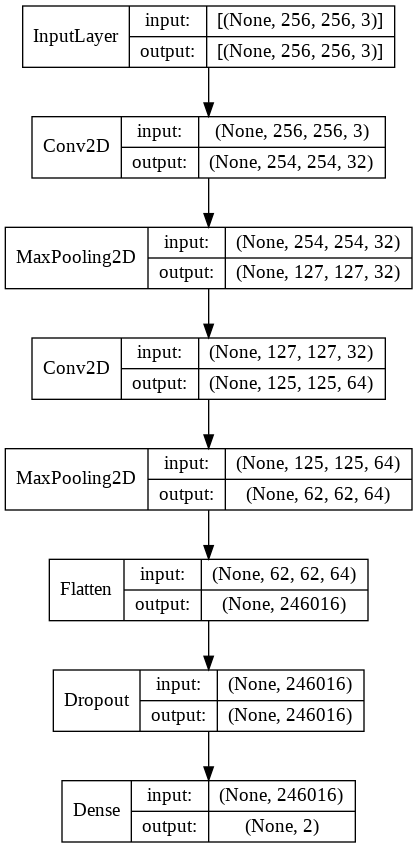

In [ ]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# use callback to find the optimal number of epochs to use
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [ ]:
# fitting and testing the model. Stopping at the optimal epoch number

history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, shuffle = True, callbacks =[earlystopping])

Epoch 1/20
76/76 [==============================] - 10s 106ms/step - loss: 81.0733 - accuracy: 0.8625 - val_loss: 0.1427 - val_accuracy: 0.9413
Epoch 2/20
76/76 [==============================] - 7s 93ms/step - loss: 0.1163 - accuracy: 0.9545 - val_loss: 0.0728 - val_accuracy: 0.9704
Epoch 3/20
76/76 [==============================] - 7s 92ms/step - loss: 0.0527 - accuracy: 0.9813 - val_loss: 0.0655 - val_accuracy: 0.9746
Epoch 4/20
76/76 [==============================] - 7s 93ms/step - loss: 0.0478 - accuracy: 0.9854 - val_loss: 0.0546 - val_accuracy: 0.9813
Epoch 5/20
76/76 [==============================] - 7s 92ms/step - loss: 0.0237 - accuracy: 0.9910 - val_loss: 0.1262 - val_accuracy: 0.9550
Epoch 6/20
76/76 [==============================] - 7s 93ms/step - loss: 0.0700 - accuracy: 0.9773 - val_loss: 0.0489 - val_accuracy: 0.9846
Epoch 7/20
76/76 [==============================] - 7s 93ms/step - loss: 0.0159 - accuracy: 0.9941 - val_loss: 0.0393 - val_accuracy: 0.9892
Epoch 8/20

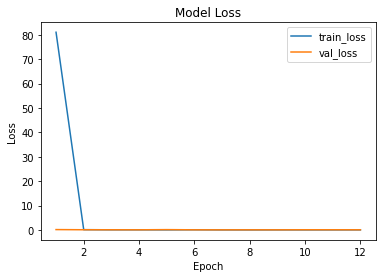

In [ ]:
epoch_count = len(history.history['loss'])
plt.plot(np.linspace(1, epoch_count, epoch_count), history.history['loss'], label='train_loss')
plt.plot(np.linspace(1, epoch_count, epoch_count), history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

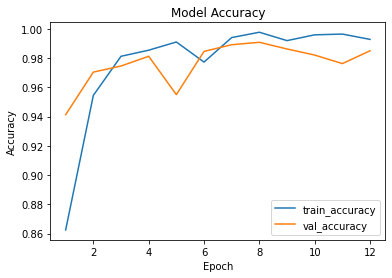

In [ ]:
plt.plot(np.linspace(1, epoch_count, epoch_count), history.history['accuracy'], label='train_accuracy')
plt.plot(np.linspace(1, epoch_count, epoch_count), history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04851112887263298
Test accuracy: 0.9850149750709534


In [ ]:
# testing saving trained model 
save_path = '/content/drive/Shareddrives/Anoushka && Ivy/Senior Design 2021_2022_Ivy and Anoushka/Trained Models/'
model.save(save_path)

INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Anoushka && Ivy/Senior Design 2021_2022_Ivy and Anoushka/Trained Models/assets


In [ ]:
# testing loading model
model = keras.models.load_model(save_path)
model.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dropout (Dropout)           (None, 246016)            0       

In [ ]:
# checking image at index 2. The :3 is to add another dimension
# to fit the 4-dimension requirement
y_pred = model.predict(x_test[2:3])[0]
y_pred

array([0.00321006, 0.9967899 ], dtype=float32)

In [ ]:
prediction = y_pred.argmax()
actual = y_test[2].argmax()

print('Prediction:', classes[prediction])
print('Actual:', classes[actual])

Prediction: Tomato_healthy
Actual: Tomato_healthy


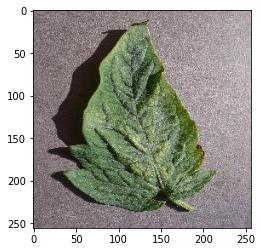

In [ ]:
plt.imshow(x_test[2])
plt.show()